In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

# Load the dataset

df = pd.read_csv('ch3_airline_passengers.csv')

df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.rename(columns={"#Passengers": "Passengers"}, inplace=True)

df['Month'] = pd.to_datetime(df['Month'])  # Convert to datetime format
df.set_index('Month', inplace=True)  # Set datetime as index

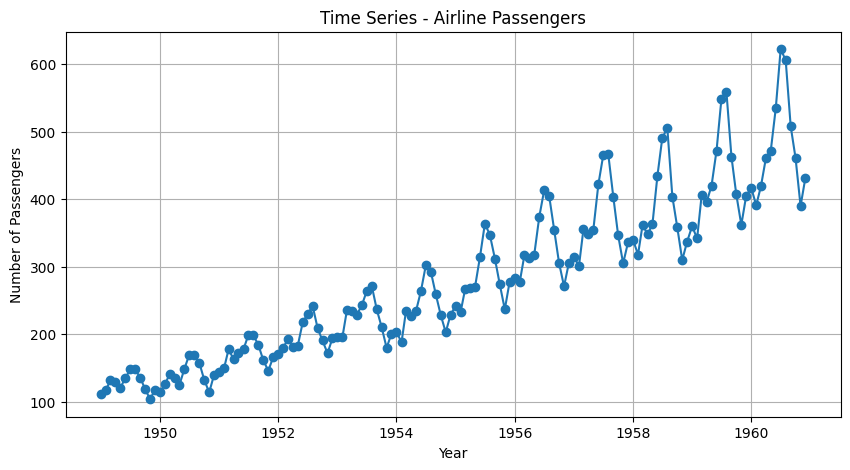

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df, marker='o', linestyle='-')
plt.title('Time Series - Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid()
plt.show()

In [ ]:
rolling_window = 12
df['Rolling_Mean'] = df['Passengers'].rolling(window=rolling_window).mean()
plt.figure(figsize=(10, 5))
plt.plot(df['Passengers'], label='Original')
plt.plot(df['Rolling_Mean'], label='Rolling Mean', linestyle='dashed')
plt.title('Rolling Mean Smoothing')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


KeyError: 'Passengers'

In [ ]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.rename(columns={df.columns[1]: "Passengers"}, inplace=True)

df['Month'] = pd.to_datetime(df['Month'])  # Convert to datetime format
df.set_index('Month', inplace=True)  # Set datetime as index

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
df = pd.read_csv('ch3_airline_passengers.csv', delimiter=",", engine="python")

# Debugging: Print actual columns
print("Columns:", df.columns)
print(df.head())  # Print first few rows

# Ensure the second column exists before renaming
if len(df.columns) > 1:
    df.rename(columns={df.columns[1]: "Passengers"}, inplace=True)
else:
    print("Error: The dataset does not have the expected columns.")


Columns: Index(['Month', 'AirPassengers'], dtype='object')
     Month  AirPassengers
0  1949-01            112
1  1949-02            118
2  1949-03            132
3  1949-04            129
4  1949-05            121


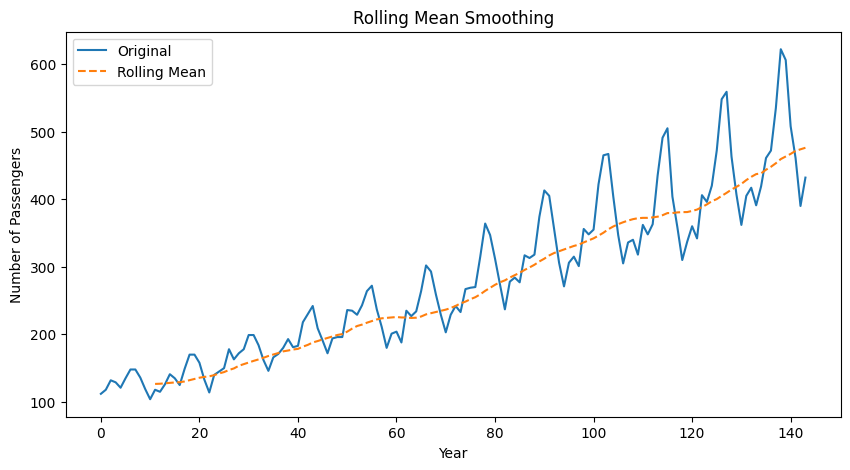

In [ ]:
# 2. Rolling Mean Plot
rolling_window = 12
df['Rolling_Mean'] = df['Passengers'].rolling(window=rolling_window).mean()
plt.figure(figsize=(10, 5))
plt.plot(df['Passengers'], label='Original')
plt.plot(df['Rolling_Mean'], label='Rolling Mean', linestyle='dashed')
plt.title('Rolling Mean Smoothing')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

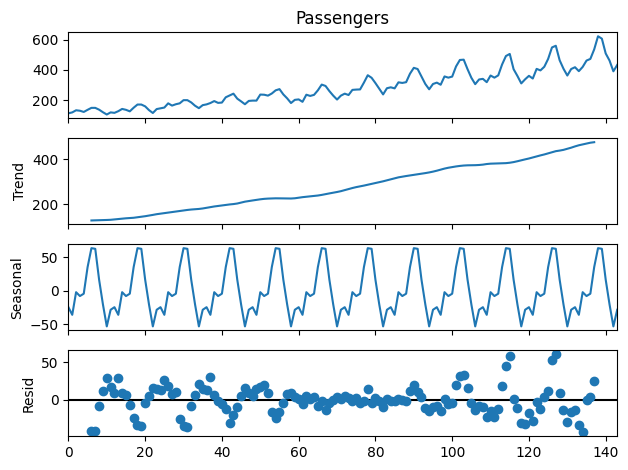

In [ ]:
# 3. Seasonal Decomposition
result = seasonal_decompose(df['Passengers'], model='additive', period=12)
result.plot()
plt.show()

In [ ]:
# 4. Box Plot by Year and Month
df['Year'] = df.index.year
df['Month'] = df.index.month_name()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Passengers', data=df)
plt.xticks(rotation=45)
plt.title('Yearly Distribution of Passengers')
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'year'

In [ ]:
df = pd.read_csv(file_path, parse_dates=['Month'], index_col='Month')

# Debugging: Check if the index is now a DatetimeIndex
print(type(df.index))  # Should print: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

# Extract Year and Month correctly
df['Year'] = df.index.year
df['Month'] = df.index.month_name()


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
# 4. Box Plot by Year and Month
df['Year'] = df.index.year
df['Month'] = df.index.month_name()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Passengers', data=df)
plt.xticks(rotation=45)
plt.title('Yearly Distribution of Passengers')
plt.show()

ValueError: Could not interpret value `Passengers` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
df = pd.read_csv(file_path, parse_dates=['Month'])
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces

# Debugging: Print actual column names
print("Columns:", df.columns)
print(df.head())

# Ensure 'Passengers' column exists
if 'Passengers' not in df.columns:
    df.rename(columns={df.columns[1]: "Passengers"}, inplace=True)


Columns: Index(['Month', 'AirPassengers'], dtype='object')
       Month  AirPassengers
0 1949-01-01            112
1 1949-02-01            118
2 1949-03-01            132
3 1949-04-01            129
4 1949-05-01            121


In [ ]:
df.set_index('Month', inplace=True)
print(type(df.index))  # Should print <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


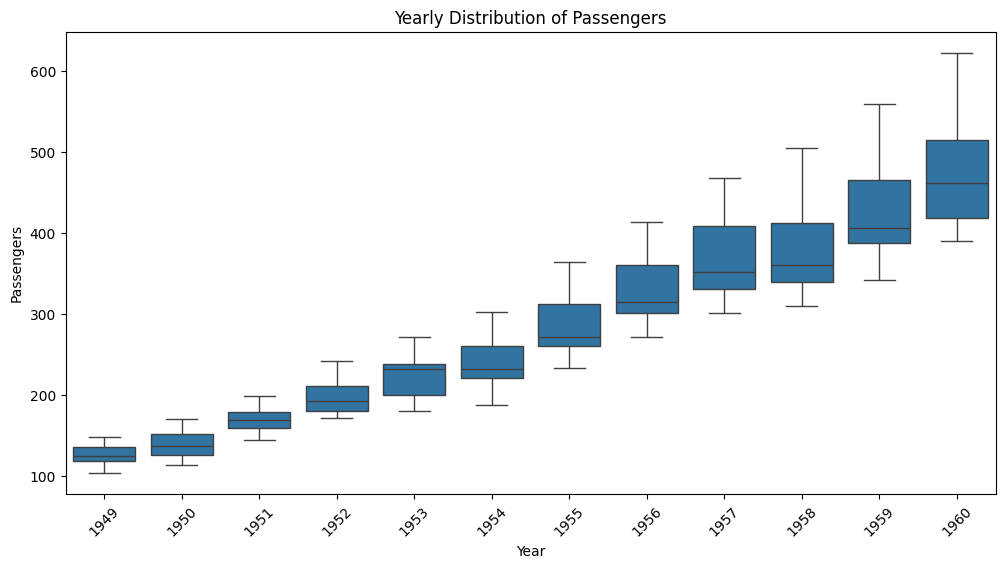

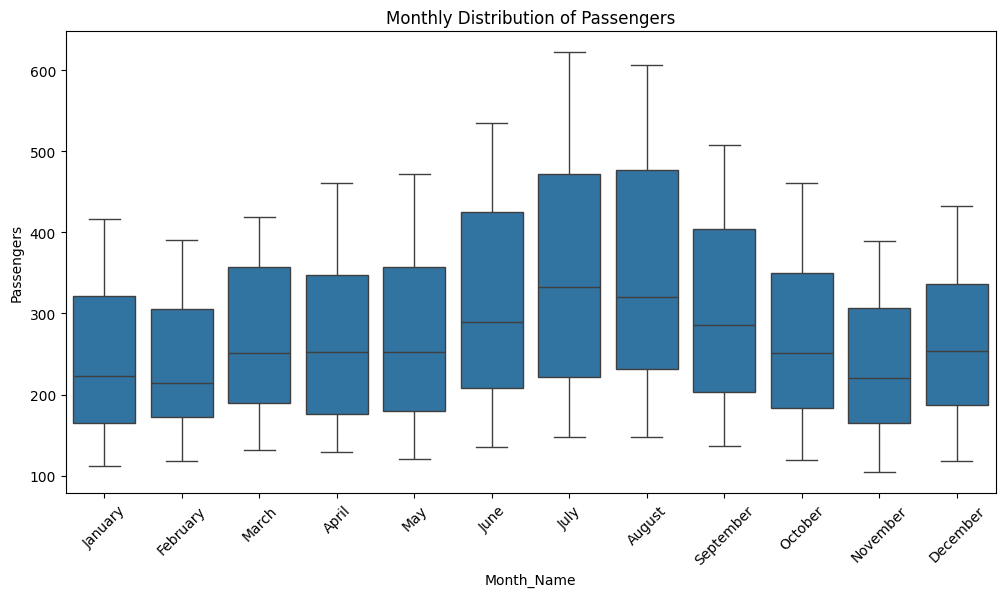

In [ ]:
df['Year'] = df.index.year
df['Month_Name'] = df.index.month_name()  # Avoid overwriting 'Month'

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Passengers', data=df)
plt.xticks(rotation=45)
plt.title('Yearly Distribution of Passengers')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month_Name', y='Passengers', data=df, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation=45)
plt.title('Monthly Distribution of Passengers')
plt.show()


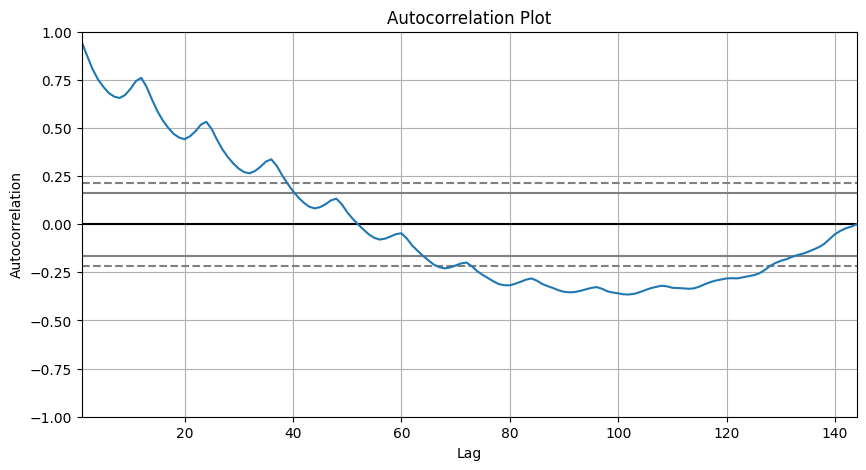

In [ ]:
# 5. Autocorrelation Plot
plt.figure(figsize=(10, 5))
autocorrelation_plot(df['Passengers'])
plt.title('Autocorrelation Plot')
plt.show()
